# Goodread Books Dataset

https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks

# 1. Importing Packages

In [8]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# 
pd.set_option('display.max_colwidth', None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-24 21:24:49.910405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Data Ingestion

In [2]:
# Importing data. Importing with error_bad_lines = False due to corrupted data points. 
train_dataset = pd.read_csv('books.csv', engine = 'python', sep = ',', error_bad_lines=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 1571: ',' expected after '"'
Skipping line 4514: ',' expected after '"'
Skipping line 9967: ',' expected after '"'
Skipping line 10870: ',' expected after '"'
Skipping line 3349: Expected 12 fields in line 3349, saw 13
Skipping line 4702: Expected 12 fields in line 4702, saw 13
Skipping line 5877: Expected 12 fields in line 5877, saw 13
Skipping line 8979: Expected 12 fields in line 8979, saw 13


# 3. Initial Data Exploration

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
train_dataset.title

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11114     Expelled from Eden: A William T. Vollmann Reader
11115                          You Bright and Risen Angels
11116                      The Ice-Shirt (Seven Dreams #1)
11117                                          Poor People
11118                          Las aventuras de Tom Sawyer
Name: title, Length: 11119, dtype: object

In [6]:
train_dataset.describe(include = 'all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11119.000000,11119,11119,11119.000000,11119,1.111900e+04,11119,11119.000000,1.111900e+04,11119.000000,11119,11119
unique,NaN,10344,6635,NaN,11119,NaN,27,NaN,NaN,NaN,3675,2289
top,NaN,The Iliad,P.G. Wodehouse,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8906,NaN,NaN,NaN,56,318
mean,21308.966184,NaN,NaN,3.934135,NaN,9.759873e+12,NaN,336.439788,1.794832e+04,542.167371,NaN,NaN
std,13093.071002,NaN,NaN,0.350384,NaN,4.430554e+11,NaN,241.177969,1.125190e+05,2577.069549,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780586e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,32103.500000,NaN,NaN,4.135000,NaN,9.780873e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


In [7]:
train_dataset.publisher.unique()

array(['Scholastic Inc.', 'Scholastic', 'Nimble Books', ..., 'Suma',
       'Panamericana Editorial', 'Editorial Presença'], dtype=object)

## 3.1 Missing Values

In [8]:
# Checking missing values 
train_dataset.isnull().sum().sum()

0

## 3.2 Duplicates

In [9]:
# Checking for duplicates
train_dataset.duplicated().sum()

0

# 4. Exploratory Data Analysis

In [10]:
train_dataset[['authors']].value_counts()

authors                                      
Stephen King                                     40
P.G. Wodehouse                                   40
Rumiko Takahashi                                 39
Orson Scott Card                                 35
Agatha Christie                                  33
                                                 ..
Joanne Harris/Fran Warde                          1
Carolyn Keene/Russell H. Tandy/Mildred Benson     1
Carolyn Keene/Russell H. Tandy/Sara Paretsky      1
Joanna Weaver                                     1
Éric-Emmanuel Schmitt                             1
Length: 6635, dtype: int64

In [11]:
# The ISBN and BookID are unique identifers. Will be dropped in the feature engineering section. 
train_dataset[['bookID','isbn','isbn13']]

,bookID,isbn,isbn13
0,1,0439785960,9780439785969
1,2,0439358078,9780439358071
2,4,0439554896,9780439554893
3,5,043965548X,9780439655484
4,8,0439682584,9780439682589
...,...,...,...
11114,45631,1560254416,9781560254416
11115,45633,0140110879,9780140110876
11116,45634,0140131965,9780140131963
11117,45639,0060878827,9780060878825


## 4.1 Features EDA

In [12]:
# Extracting unique books per author. 
all_authors_exploded = list()
all_authors = train_dataset.authors
for authors in all_authors:
    if '/' in authors:
        authors_in_row = authors.split('/')
        all_authors_exploded.extend(authors_in_row)
    else:
        all_authors_exploded.extend([authors])
        
unique_authors = np.unique(all_authors_exploded, return_counts = True)[0]
counter = np.unique(all_authors_exploded, return_counts = True)[1]
unique_authors = pd.DataFrame(data = [unique_authors,counter]).T
unique_authors.columns = ['author_name','total_books']
unique_authors = unique_authors.sort_values(by = 'total_books', ascending = False)
unique_authors_top_10 = unique_authors.head(10).copy()

<AxesSubplot: xlabel='total_books', ylabel='author_name'>

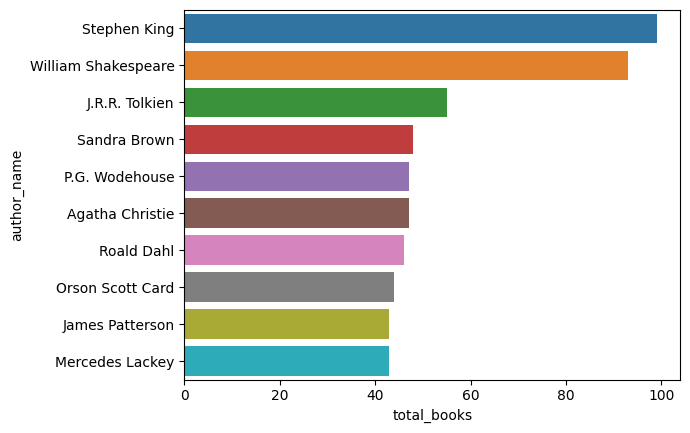

In [13]:
# Plotting top 10. 
sns.barplot(data = unique_authors_top_10, y = 'author_name', x = 'total_books', orient = 'h')

## Average Rating

<AxesSubplot: xlabel='average_rating', ylabel='Count'>

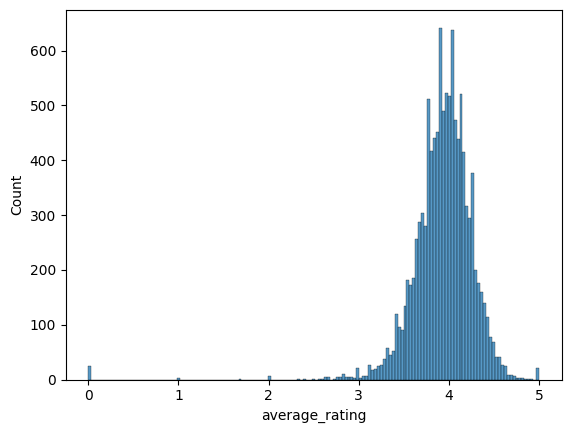

In [14]:
sns.histplot(train_dataset.average_rating)

## Language Code

<AxesSubplot: xlabel='bookID', ylabel='language_code'>

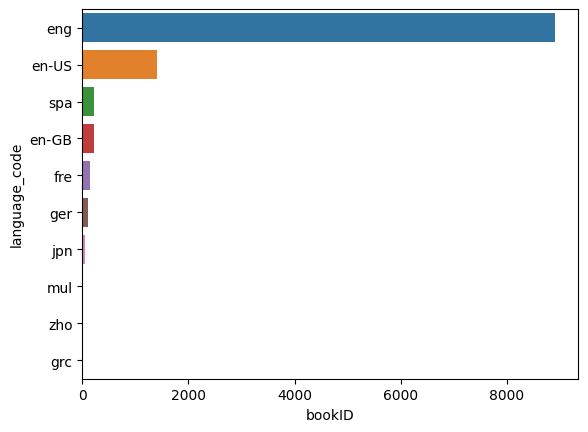

In [15]:
language_code = pd.DataFrame(train_dataset.groupby('language_code')['bookID'].count().sort_values(ascending = False).reset_index())
sns.barplot(data = language_code.head(10), y = 'language_code', x = 'bookID', orient = 'h')


## Num Pages

<AxesSubplot: xlabel='  num_pages', ylabel='Count'>

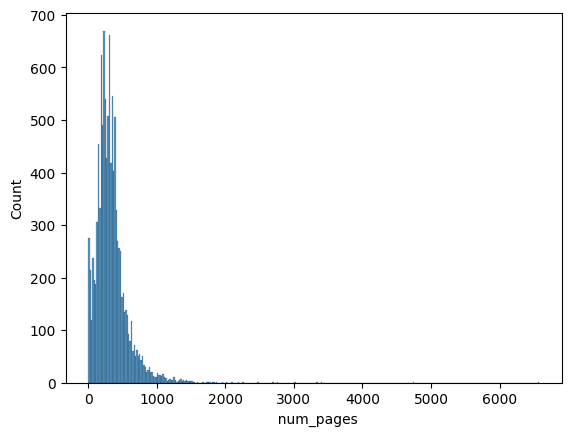

In [16]:
num_pages = train_dataset['  num_pages']
sns.histplot(num_pages)

## Publisher

In [17]:
publisher_data = pd.DataFrame(pd.DataFrame(train_dataset.publisher).value_counts().head(30)).reset_index()
publisher_data.columns = ['publisher','publisher_count']

<AxesSubplot: xlabel='publisher_count', ylabel='publisher'>

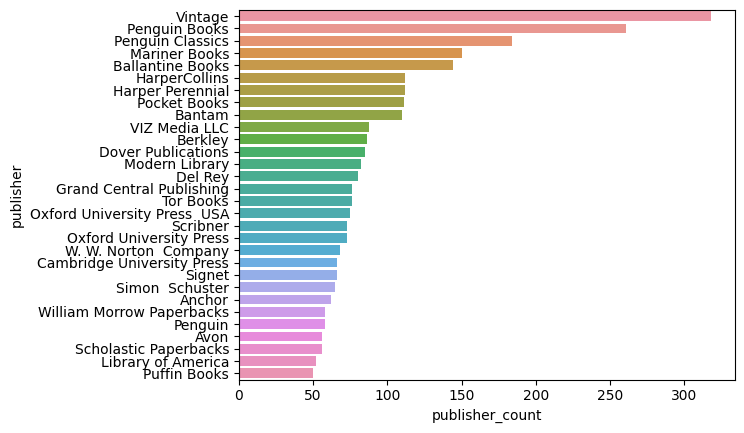

In [18]:
sns.barplot(data = publisher_data, y = 'publisher', x = 'publisher_count')

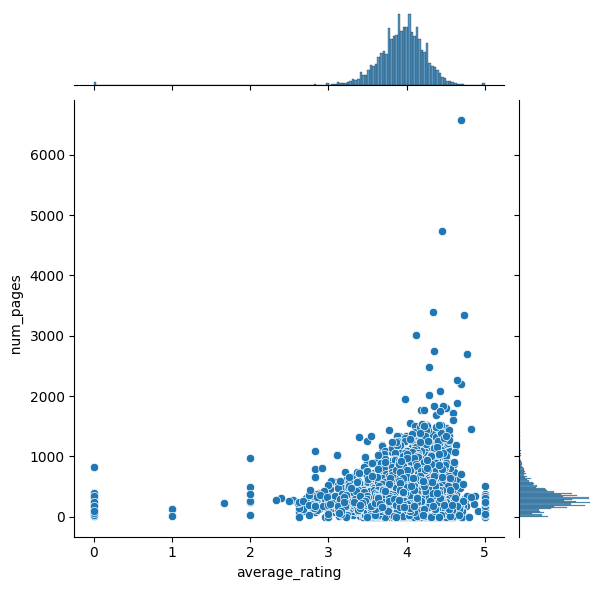

In [162]:
# Plotting Average Rating and Num_pages to see if there is a correlation between these features.
sns.jointplot(data = train_dataset, x = 'average_rating', y = '  num_pages', kind = 'scatter')

In [ ]:
sns.jointplot(data = train_dataset, x = 'average_rating', y = '  num_pages', kind = 'scatter')

# 5. Feature Engineering

In [71]:
# Merging english language codes
train_dataset.language_code = np.where(train_dataset.language_code.isin(['en-US','en-GB','en-CA']),'eng',train_dataset.language_code)




# 6. Model Creation

In [19]:
# Utilizing BERT
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [117]:
# Tokenizing on a sentence level the various relevant text columns
corpus_book_title = train_dataset.title.tolist()
corpus_authors = train_dataset.authors.tolist()
corpus_language = train_dataset.language_code.tolist()

In [118]:
# Encoding Book Titles 
encoded_corpus_book_titles = model.encode(corpus_book_title, show_progress_bar=True)


Batches: 100%|████████████████████████████████| 348/348 [00:55<00:00,  6.27it/s]


In [119]:
# Encoding Book Authors
encoded_corpus_authors = model.encode(corpus_authors, show_progress_bar=True)

Batches: 100%|████████████████████████████████| 348/348 [00:42<00:00,  8.21it/s]


In [120]:
embedded_df = pd.DataFrame({'book_titles': corpus, 'authors' : corpus_authors ,'language_code' : corpus_language})

In [121]:
def return_cosine_similarity(title : str, encoded_corpus: list):
    # Function that returns the cosine similarity between a word and a corpus
    index = embedded_df[embedded_df.book_titles == title].index[0]  
    vectorized_current_book_title = [encoded_corpus[index]]
    cosine_similarity_array = [(cosine_similarity(vectorized_current_book_title,[x]))[0][0] for x in encoded_corpus]
    return cosine_similarity_array


def return_language_code_of_title(embedded_df, title : str):
    # Returns the language code of a given book title.
    index = embedded_df[embedded_df.book_titles == title].index[0]
    language_code = embedded_df.language_code[index] 
    return language_code


def alter_df(embedded_df :, title, encoded_corpus_movie_titles, encoded_corpus_book_titles ):
    # Returns modified dataframe with cosine similarities. 
    embedded_df['cosine_similarity_book_title'] = return_cosine_similarity(title,encoded_corpus_movie_titles)
    embedded_df['cosine_similarity_authors'] = return_cosine_similarity(title,encoded_corpus_movie_authors)

    embedded_df['cosine_sum'] = embedded_df.cosine_similarity_book_title + embedded_df.cosine_similarity_authors
    
    title_language_code = return_language_code_of_title(embedded_df,title)

    embedded_df = embedded_df[embedded_df.book_titles != title]
    embedded_df = embedded_df[embedded_df.language_code == title_language_code]
    embedded_df = embedded_df.sort_values(by = 'cosine_sum', ascending = False)
    
    return embedded_df 





In [150]:
embedded_df = pd.DataFrame({'book_titles': corpus, 'authors' : corpus_authors ,'language_code' : corpus_language})
embedded_df = alter_df(embedded_df,'The Ground Beneath Her Feet',encoded_corpus_book_titles, encoded_corpus_authors )




In [151]:
embedded_df

,book_titles,authors,language_code,cosine_similarity_book_title,cosine_similarity_authors,cosine_sum
2687,Grimus,Salman Rushdie,eng,0.607709,1.000000,1.607709
1385,Fury,Salman Rushdie,eng,0.519112,1.000000,1.519112
2684,The Moor's Last Sigh,Salman Rushdie,eng,0.439256,1.000000,1.439255
3505,The Satanic Verses,Salman Rushdie,eng,0.423637,1.000000,1.423636
1383,Midnight's Children,Salman Rushdie,eng,0.406816,1.000000,1.406816
...,...,...,...,...,...,...
9033,How to Talk to Anyone: 92 Little Tricks for Big Success in Relationships,Leil Lowndes,eng,-0.083643,0.393739,0.310097
9838,Boeing Versus Airbus: The Inside Story of the Greatest International Competition in Business,John Newhouse,eng,-0.114896,0.412478,0.297581
1790,The Best of America's Test Kitchen 2007: The Year's Best Recipes Equipment Reviews and Tastings,America's Test Kitchen,eng,-0.089036,0.365305,0.276269
6382,New York City's Best Dive Bars: Drinking and Diving in the Five Boroughs,Wendy Mitchell/June Kim,eng,-0.086916,0.348968,0.262052


In [169]:
train_dataset.head(15)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy #1-5),Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1-5),Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1),Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [164]:
import requests


In [226]:
def retrieve_book_meta_data_google_api(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    resp = requests.get(url)
    json = resp.json()
    return json




In [228]:
isbn_array = train_dataset.isbn.values

json_array
for isbn_key in isbn_array


array(['0439785960', '0439358078', '0439554896', ..., '0140131965',
       '0060878827', '8497646983'], dtype=object)

In [222]:
json['items'][0]['volumeInfo']['categories'][0]

'Fiction'

In [223]:
train_dataset['']

{'kind': 'books#volumes',
 'totalItems': 1,
 'items': [{'kind': 'books#volume',
   'id': 'LH5C9q83T6wC',
   'etag': 'udjA+xwqFqQ',
   'selfLink': 'https://www.googleapis.com/books/v1/volumes/LH5C9q83T6wC',
   'volumeInfo': {'title': 'Unauthorized Harry Potter and the Deathly Hallows News',
    'subtitle': 'Harry Potter Book Seven and Half-Blood Prince Analysis',
    'authors': ['W. Frederick Zimmerman'],
    'publisher': 'Nimble Books',
    'publishedDate': '2005-04',
    'description': 'Through the magic of print-on-demand technology, this "nimble" guide to the work of best-selling author J. K. Rowling provides the latest news about the author and her works, updated whenever there are significant developments. Unlike a conventional book, for which editions are printed in quantity every couple of years, this "living book" goes through frequent "mini-editions" and is printed fresh whenever customers place an order. Purchasers are entitled to free PDF updates! An entirely new section of 

In [217]:
url

"https://www.googleapis.com/books/v1/volumes?q=isbn:'0767910435"

In [7]:
len(train_dataset)

NameError: name 'train_dataset' is not defined

In [229]:
response = openai.Image.create(
  prompt="a white siamese cat",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

NameError: name 'openai' is not defined

In [6]:
import openai

ModuleNotFoundError: No module named 'openai'